<a href="https://colab.research.google.com/github/Malbasahi/Resume_Prediction/blob/main/Resume_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
# Sample resume data (replace with your actual data)
data = pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [19]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


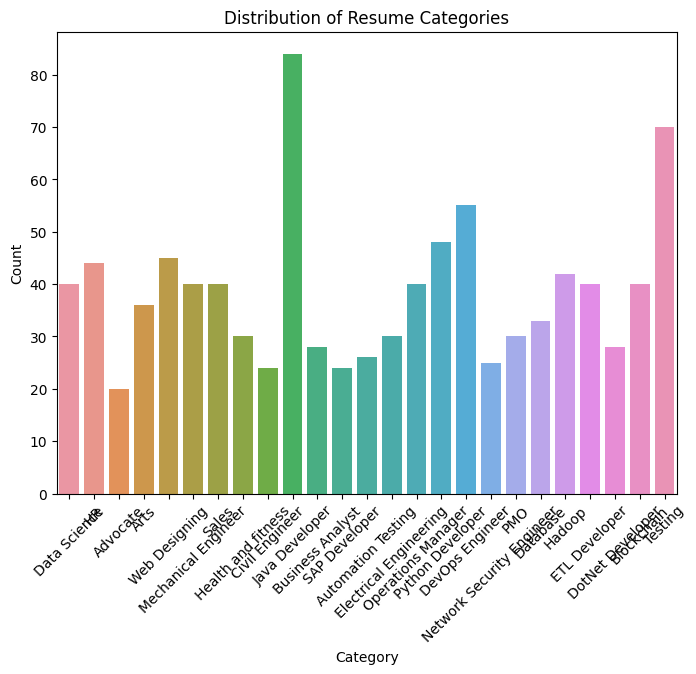

In [27]:
# Visualize the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Category')
plt.title('Distribution of Resume Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

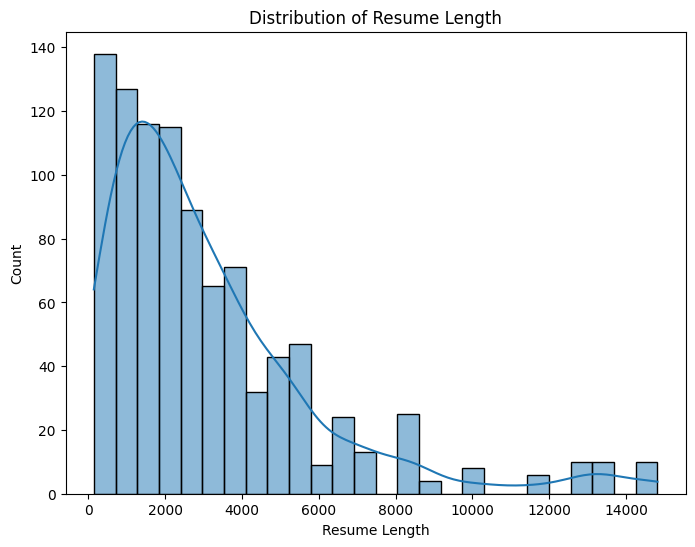

In [28]:
# Visualize the length of resumes
data['Resume Length'] = data['Resume'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Resume Length', kde=True)
plt.title('Distribution of Resume Length')
plt.xlabel('Resume Length')
plt.ylabel('Count')
plt.show()

In [20]:
# Preprocess the resume text and extract features (TF-IDF in this example)
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data["Resume"])
y = data["Category"]

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Choose a model (Logistic Regression in this example)
model = LogisticRegression()

In [23]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Make predictions (replace with actual analyzed resumes)
analyzed_resumes = [
    "Skills * Programming Languages: Python, Java, SQL.",
    "Education Details: B.E in Computer Science, XYZ University.",
]

X_analyzed = tfidf_vectorizer.transform(analyzed_resumes)
predictions = model.predict(X_analyzed)

In [25]:
# Print the predictions for the analyzed resumes
for resume, prediction in zip(analyzed_resumes, predictions):
    print(f"Analyzed Resume: {resume}")
    print(f"Predicted Category: {prediction}")

Analyzed Resume: Skills * Programming Languages: Python, Java, SQL.
Predicted Category: Java Developer
Analyzed Resume: Education Details: B.E in Computer Science, XYZ University.
Predicted Category: HR


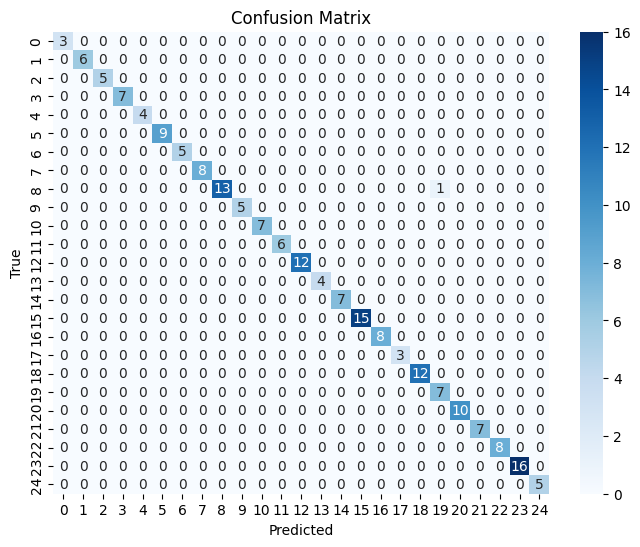

In [33]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00  